In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("Hotel Bookings.csv")



In [4]:
data.head(500)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## A) handel the missing value

In [6]:
data.isna().sum().sort_values(ascending=False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [7]:
data["company"].fillna(0,inplace=True)
data["agent"].fillna(0,inplace=True)
data["country"].fillna("other",inplace=True)
data["children"].fillna(0,inplace=True)


In [8]:
data.isna().sum().sort_values(ascending=False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [9]:
data['total_people']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

In [10]:
data=data.rename(columns={'total_people':'total_people_stay'})

In [11]:
data['total_people']=data['adults']+data['children']+data['babies']

In [12]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


## B) EDA (exploratory data analysis)

## univariate analysis

## i) how many people does cancel booking out off all booking

<AxesSubplot:ylabel='is_canceled'>

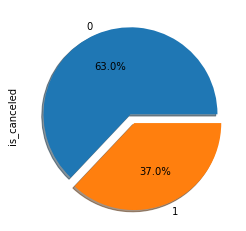

In [13]:
data['is_canceled'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.01,0.1],shadow=True)
# the people cancel 37.0% out of all booking

## ii) how many people get reeated

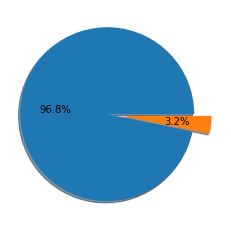

In [14]:
plt.pie(data["is_repeated_guest"].value_counts(),autopct='%0.1f%%',explode=[0.1,0.1],shadow=True)
plt.show()

In [15]:
countrywise=data[data['is_canceled']==0 ]['country'].value_counts().reset_index()
countrywise.columns=['country','no_of_guest']

In [16]:
countrywise

,country,no_of_guest
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


In [17]:
# categorical_cols=list(set(data.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(data.describe()))
# for cols in categorical_cols:
#     print(f"the unique value of {cols} is ,{(data[cols].unique())}")
for i in data.columns:
    print('columns',i)
    print('\n')
    print(data[i].unique())

columns hotel


['Resort Hotel' 'City Hotel']
columns is_canceled


[0 1]
columns lead_time


[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 2

In [18]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people_stay,total_people
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,3.427900,1.968239
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,2.557439,0.722394
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,3.000000,2.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,69.000000,55.000000


## iii) Which type of hotel is mostly prefered by the guests?

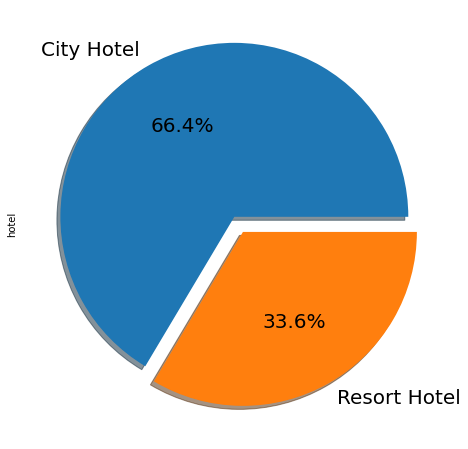

In [19]:
data['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.show()

In [20]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [21]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'],format="%Y-%m-%d")


In [22]:
df1=data[['is_canceled','lead_time','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_people_stay','total_people']]


<AxesSubplot:>

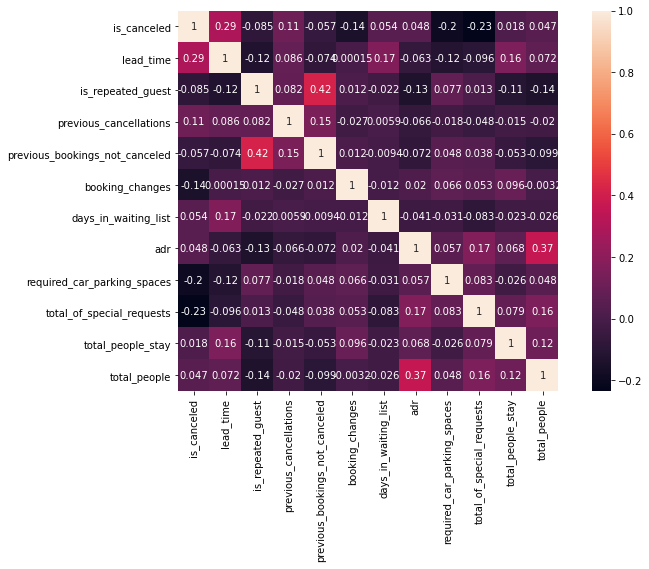

In [23]:
corr_heat=df1.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(corr_heat,annot=True,annot_kws={'size':10},fmt='.2g',square=True)


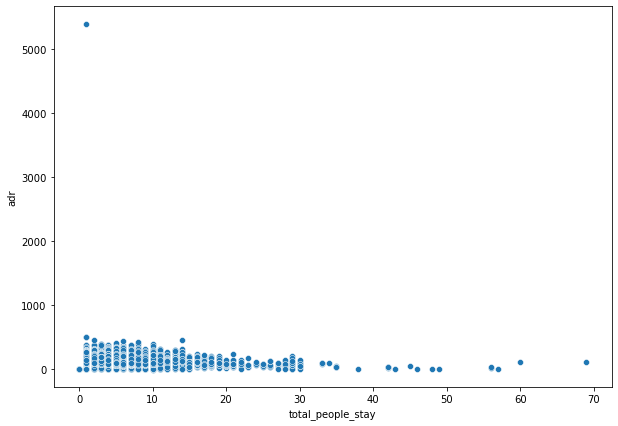

In [24]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='total_people_stay',y='adr',data=df1)
plt.show()

In [25]:
data.drop(data[data['adr']>500].index,inplace=True)


<AxesSubplot:xlabel='total_people_stay', ylabel='adr'>

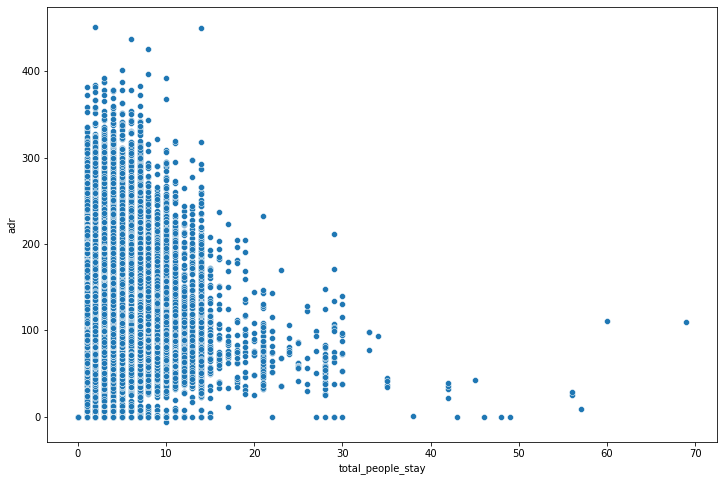

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_people_stay',y='adr',data=data)

## iv) Which agent makes most no. of bookings?

In [28]:
d1=data['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'number_of_booking'})
d1.sort_values(by='number_of_booking',ascending=False)
d1.drop(d1[d1['agent']==0].index)
d1=d1[:10]

<AxesSubplot:xlabel='agent', ylabel='number_of_booking'>

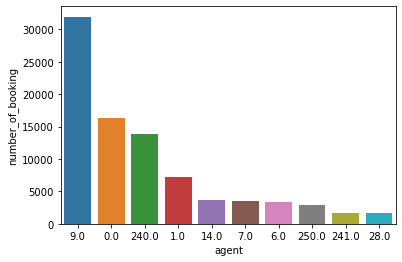

In [29]:
sns.barplot(x='agent',y='number_of_booking',data=d1,order=d1.sort_values(by='number_of_booking',ascending=False).agent)

### agent 9 has made most numbers of booking

## v) Which room type is in most demand and which room type generatest highest adr?

In [30]:
data['assigned_room_type'].value_counts()
# grp=data.groupby('assigned_room_type')
# data['reserved_room_type']=grp.size()

A    74052
D    25322
E     7806
F     3751
G     2552
C     2374
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

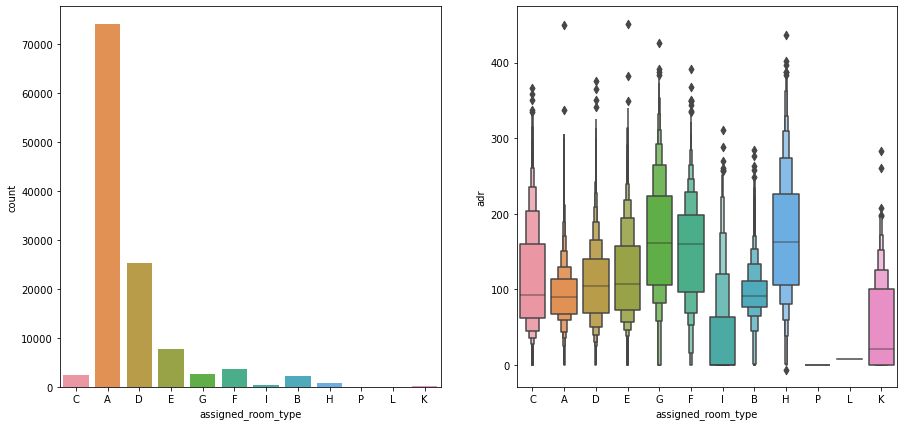

In [31]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
sns.countplot(ax=axes[0],x=data['assigned_room_type'],data=data)
sns.boxenplot(ax=axes[1],x=data['assigned_room_type'],y=data['adr'])
plt.show()

### vii) Let us see from which countries most of the customers visit these hotels?

In [32]:
# d2=data['country'].value_counts().reset_index().rename(columns={'index':'country','country':'no of booking'})
# d2=d2[:10]

In [33]:
# sns.barplot(x=d2.index,y=d2['no of booking'])

In [34]:
grp_by_country = data.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2=d2[:10]

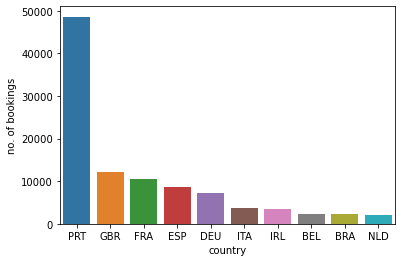

In [35]:
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

### C) Hotel wise analysis

In [36]:
grp_by_hotel=data.groupby('hotel')
d3=pd.DataFrame((grp_by_hotel.size()/data.shape[0]*100)).reset_index().rename(columns={0:'booking %'})
d3

,hotel,booking %
0,City Hotel,66.446095
1,Resort Hotel,33.553905


<AxesSubplot:xlabel='hotel', ylabel='booking %'>

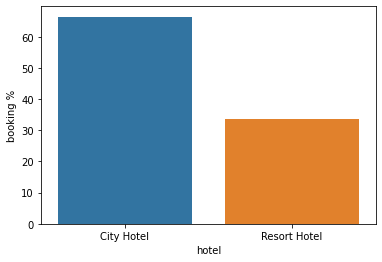

In [37]:
sns.barplot(x=d3['hotel'],y=d3['booking %'])

### i) which hotel seems to make more revenue?

In [38]:
d4=grp_by_hotel['adr'].agg(np.mean).reset_index().rename(columns={'adr':'adr avg'})

In [39]:
d4

,hotel,adr avg
0,City Hotel,105.232620
1,Resort Hotel,94.942619


<AxesSubplot:xlabel='hotel', ylabel='adr avg'>

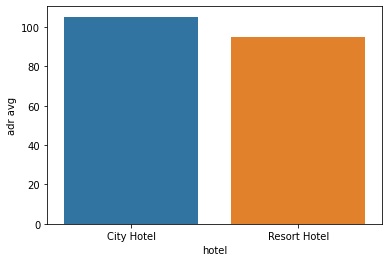

In [40]:
sns.barplot(x=d4['hotel'],y=d4['adr avg'])

In [41]:
d5=grp_by_hotel['lead_time'].median().reset_index().rename(columns={'lead_time':'lead_time_meadian'})
d5

,hotel,lead_time_meadian
0,City Hotel,74
1,Resort Hotel,57


<AxesSubplot:xlabel='lead_time_meadian', ylabel='hotel'>

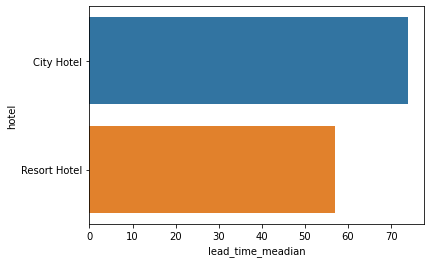

In [42]:
sns.barplot(x=d5['lead_time_meadian'],y=d5['hotel'])

In [43]:
d6=grp_by_hotel['is_repeated_guest'].count().reset_index()
d6

,hotel,is_repeated_guest
0,City Hotel,79328
1,Resort Hotel,40059


### ii) repeated hotel type by guest

<AxesSubplot:xlabel='hotel', ylabel='is_repeated_guest'>

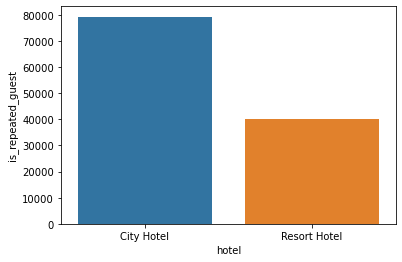

In [44]:
sns.barplot(x=d6['hotel'],y=d6['is_repeated_guest'])

#### city hotel most repeat by guest

### iii) Distribution Channel

### Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [49]:
data.distribution_channel.value_counts(normalize=True)

TA/TO        0.819754
Direct       0.122668
Corporate    0.055919
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

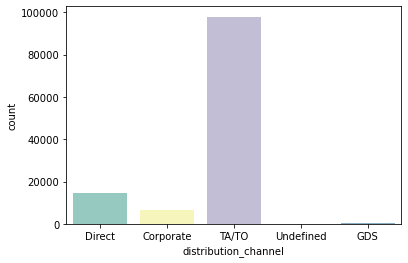

In [50]:
sns.countplot(data['distribution_channel'],palette="Set3")

In [51]:
data.reservation_status.value_counts(normalize=True)

Check-Out    0.629583
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='reservation_status', ylabel='count'>

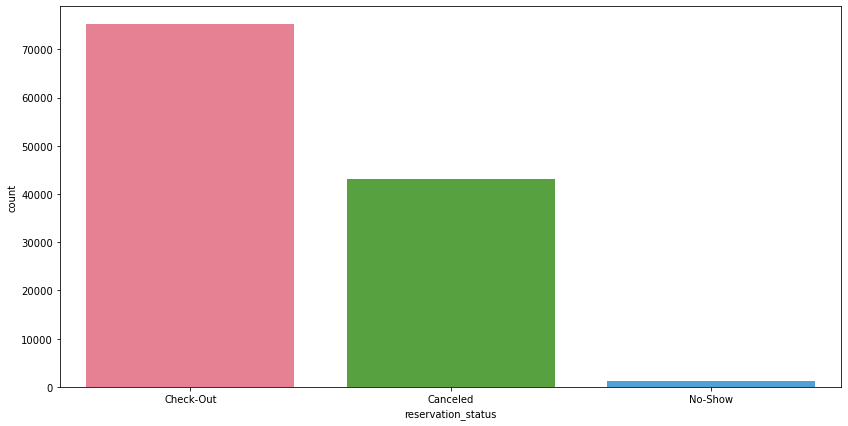

In [53]:
plt.figure(figsize=(14,7))
sns.countplot(data['reservation_status'],palette='husl')

### iv) Average Daily Rate (ADR)


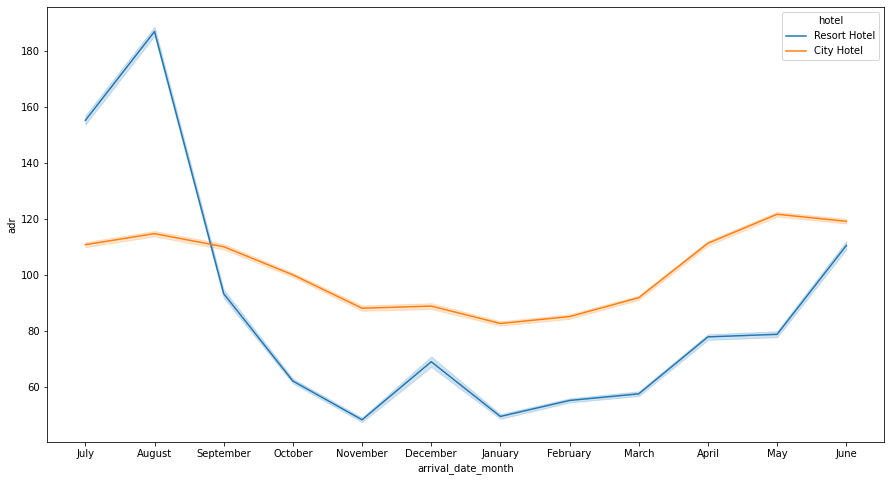

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=data)
plt.show()